# <B>Marketing Sales Data</b>

##### <B>Multiple Linear Regression</B>

In [18]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [5]:
data = pd.read_csv('marketing_sales.csv')

In [7]:
#Displaying top rows of data
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,3.518070,2.293790,Micro,55.261284
1,Low,7.756876,2.572287,Mega,67.574904
2,High,20.348988,1.227180,Micro,272.250108
3,Medium,20.108487,2.728374,Mega,195.102176
4,High,31.653200,7.776978,Nano,273.960377


In [8]:
data.shape

(572, 5)

### <B>Data Exploration</b>

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572 entries, 0 to 571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            572 non-null    object 
 1   Radio         572 non-null    float64
 2   Social Media  572 non-null    float64
 3   Influencer    572 non-null    object 
 4   Sales         572 non-null    float64
dtypes: float64(3), object(2)
memory usage: 22.5+ KB


##### <B>TV</B> and <B>Influencer</B> are categorical variables whereas <B>Radio</B>, <B>Social Media</B> and <B>Sales</B> are continious variables

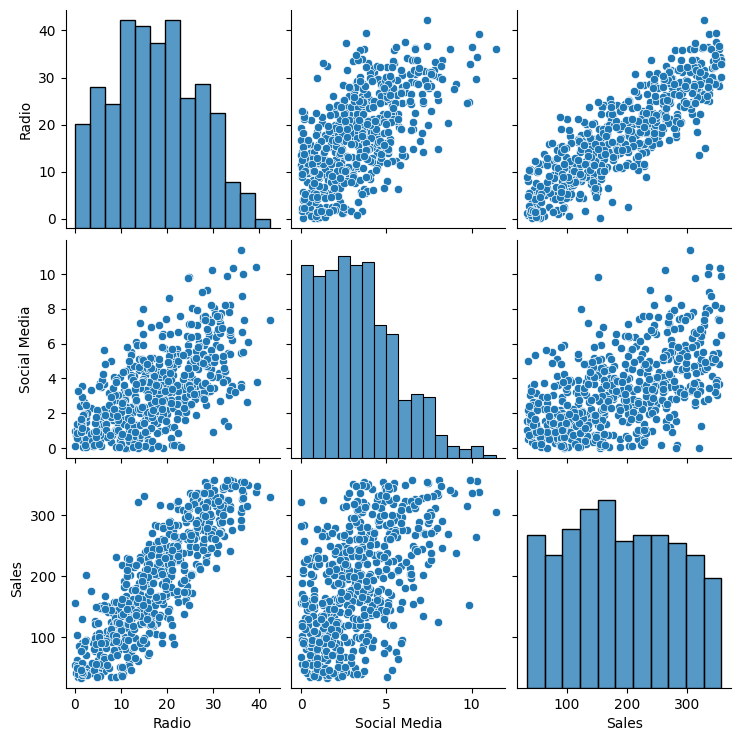

In [9]:
# Create a pairplot of variables
sns.pairplot(data)

##### <B>Radio</B> and <B>Social Media</B> both seem to have linear relationship to <B>Sales</B>

##### <B>Mean for categorical values</B>

In [16]:
#Calculating mean sales for each TV category
data.groupby(data['TV'])['Sales'].mean()

TV
High      300.853195
Low        90.984101
Medium    195.358032
Name: Sales, dtype: float64

In [17]:
#Calculating mean sales for each Influencer category
data.groupby(data['Influencer'])['Sales'].mean()

Influencer
Macro    181.670070
Mega     194.487941
Micro    188.321846
Nano     191.874432
Name: Sales, dtype: float64

##### <B>TV</B> can be used to predict <B>Sales</B> as For high TV value mean of Sale is highest and lowest for Low value ,whereas there is not any visible trend in Influencer that can impact <B>Sales</b>

In [26]:
#Renaming Column names since ols does not work on columns with spaces
data.rename(columns={'Social Media':'Social_Media'}, inplace= True)

### <B>Data Cleaning</B>

In [27]:
data = data.dropna()

In [28]:
data.isna().any(axis=1).sum()

0

### <B>Data Modelling</B>

##### The dependent variable (y) is <b>Sales</b> the independent variables here are <b>Radio</B> (x1) and <b>TV</B> (x2) <br> we rejected  <b>Social_Media</B> because it is linearly related to independent variable <b>Radio</b>

In [52]:
# Define ols formulae
ols_formula = 'Sales ~ C(TV) + Radio'

In [53]:
OLS = ols(formula = ols_formula, data = data)

In [54]:
model = OLS.fit()

In [55]:
summary = model.summary()

In [56]:
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     1783.
Date:                Tue, 28 Jan 2025   Prob (F-statistic):          1.63e-288
Time:                        18:19:01   Log-Likelihood:                -2714.0
No. Observations:                 572   AIC:                             5436.
Df Residuals:                     568   BIC:                             5453.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         218.5261      6.261     34.902      0.000     206.228     230.824
C(TV)[T.Low]     -154.2971      4.929    -31.303      0.000    -163.979    -144.616
C(TV)[T.Medium]   -75.3120      3.624    -20.780      0.000     -82.431     -68.193
Radio               2.9669      0.212     14.015      0.000       2.551       3.383
==============================================================================
Omnibus:                       61.244   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.077
Skew:                           0.046   Prob(JB):                     0.000119
Kurtosis:                       2.134   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###  <b>Model Assumption</B> 

#### <B>Assumption # 01 Linearity</B>

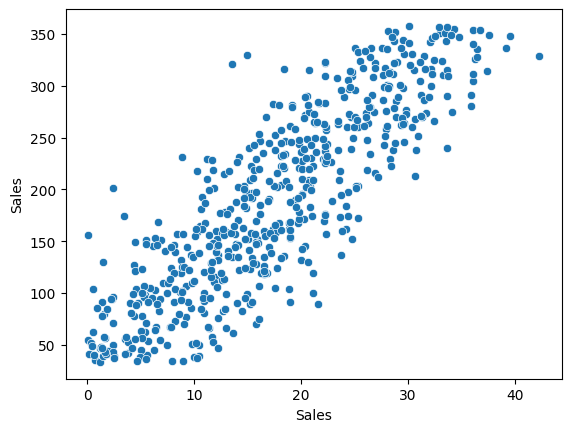

In [57]:
# Scatterplot of Sales and Radio 
fig = sns.scatterplot(x=data['Radio'],y=data['Sales'])
fig.set_xlabel("Radio")
fig.set_xlabel("Sales")
plt.show()

##### <B>Sales</B> and <B>Radio</b> are linearly related

#### <B>Assumption # 02 Independent Observation</b>

##### As each marketing promotion (i.e., row) is independent from one another, the independence assumption is not violated.

#### <B>Assumption # 03 Normality</b>

##### QQ plot to verify normality

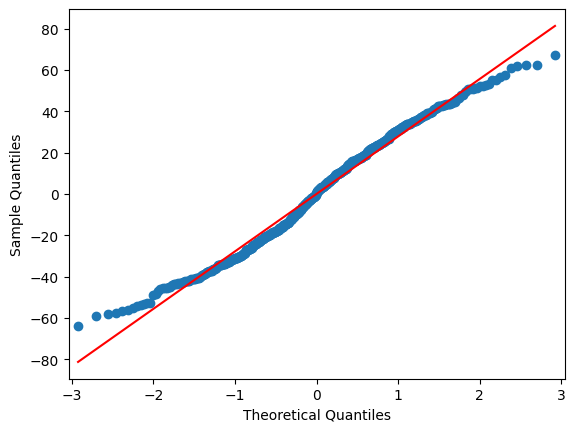

In [58]:
residuals = model.resid
fig = sm.qqplot(residuals,line='s')
plt.show()

##### Since residuals appear in straight line, Normality is also not violated

#### <B>Assumption # 04 Homoscadicity</B>

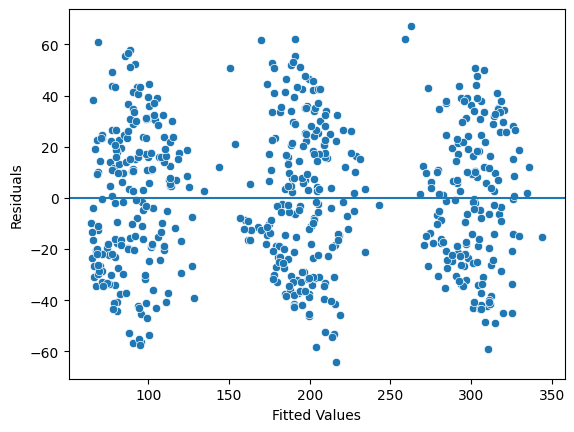

In [63]:
fig = sns.scatterplot(x = model.fittedvalues, y = model.resid)
fig.axhline(0)
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")
plt.show()

##### The fitted values are in three groups because the categorical variable is dominating in this model, meaning that TV is the biggest factor that decides the sales. However, the variance where there are fitted values is similarly distributed, validating that the assumption is met.

### <B>Assumption # 04 No multicollinearity</B>

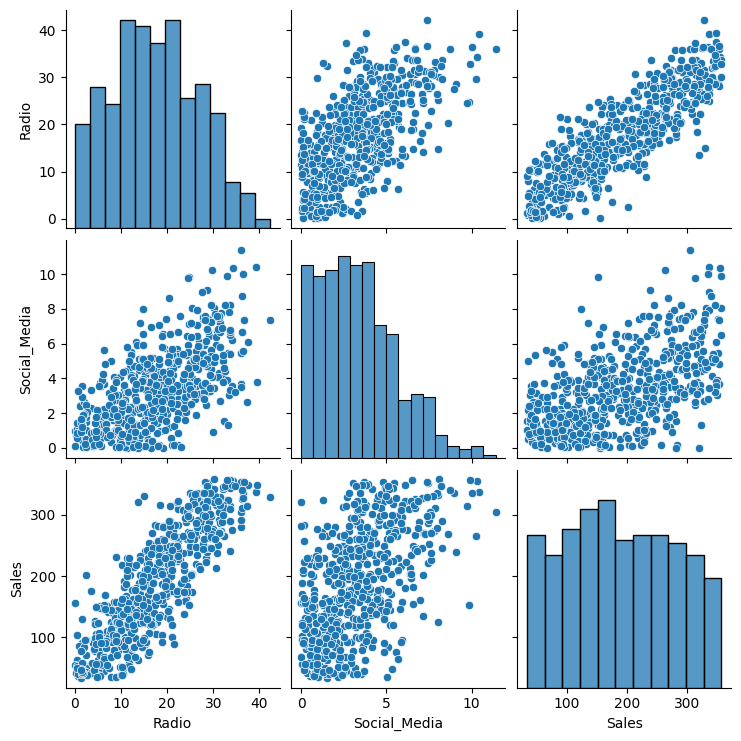

In [64]:
# Create Pairplot of data
sns.pairplot(data)

In [76]:
#Caluclating VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
x= data[['Radio','Social_Media']]
vif=[variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif = zip(x,vif)
print(list(vif))

[('Radio', 5.170921621625241), ('Social_Media', 5.170921621625241)]


##### The model has only one continious independent variable Radio hence there is not any multicolinearity issue. If we had taken Social_Media as independent variable, it could have caused this assumption to violate

### <B>Result and interpretation</B>

summary

##### Using Radio and TV as independent variable to predict Sales gives R-squared of 0.904 or 90.4% which make them excellent predictor of Sales

#### <b>Model Coefficents</B>

##### 1. bo = 218.5261
##### 2. b TV[Low] = -154.2971
##### 3. bTV[Medium] = 	-75.3120
##### 4. b Radio = 	2.9669

##### Equation will be <b>Sales = 218.5261 − 154.2971 ∗ XTVLow −75.3120 ∗XTVMedium + 2.9669 ∗ XRadio</b>

##### The default TV category in the model is "High" because the other categories, "Medium" and "Low," have their own coefficients. These coefficients are negative, which means that sales are generally lower for "Medium" and "Low" TV categories compared to the "High" category, assuming the Radio promotion stays the same.

##### For instance, the model predicts that using a "Low" TV promotion results in 154.3 fewer sales, on average, compared to a "High" TV promotion, assuming the same Radio promotion level.

##### The positive coefficient for Radio confirms that sales increase as Radio promotion increases, showing a positive relationship that we also noticed earlier during data exploration.

##### All the coefficients have a p-value of 0.000, meaning they are statistically significant at the 0.05 level. When presenting results, it's important to include the 95% confidence intervals for each coefficient.

##### For example, there is a 95% chance that the interval [−163.979, −144.616] contains the true value of the difference in sales between "Low" and "High" TV promotions.